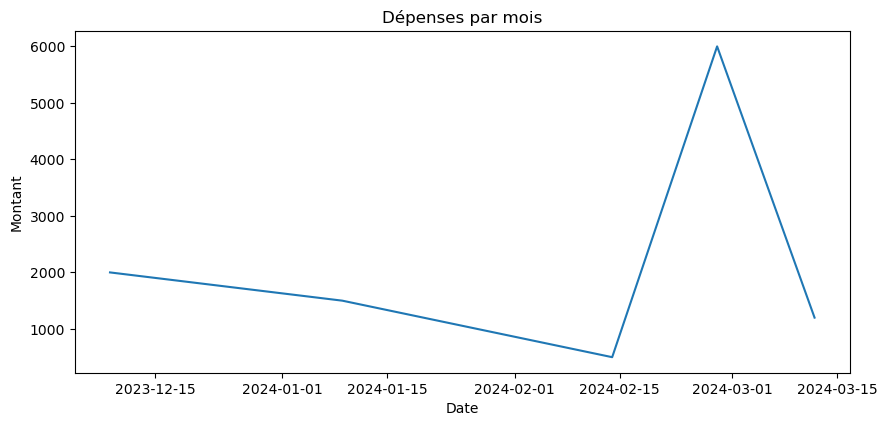

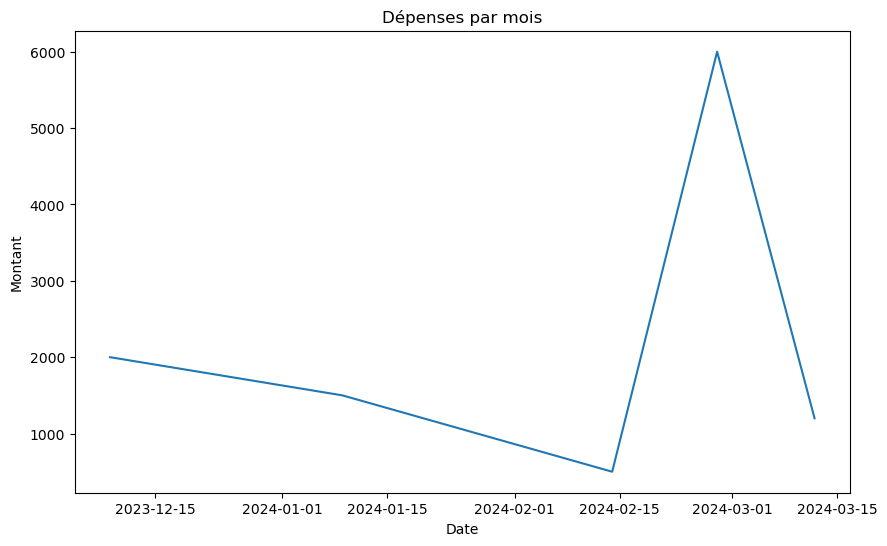

In [7]:
import tkinter as tk
from tkinter import messagebox
from tkinter import ttk
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg

# Variables globales
root = tk.Tk()
root.title("Suivi des dépenses")

expenses_df = None
date_entry = None
amount_entry = None
description_entry = None

def init_expenses():
    global expenses_df
    try:
        expenses_df = pd.read_csv("depenses.csv", parse_dates=["Date"])
    except FileNotFoundError:
        expenses_df = pd.DataFrame(columns=["Date", "Montant", "Description"])

def add_expense():
    global date_entry, amount_entry, description_entry, expenses_df
    date = date_entry.get()
    amount_str = amount_entry.get()
    description = description_entry.get()

    if date and amount_str:
        try:
            amount = float(amount_str)
        except ValueError:
            messagebox.showerror("Erreur", "Montant invalide")
            return

        new_expense = pd.DataFrame({"Date": [date], "Montant": [amount], "Description": [description]})
        expenses_df = pd.concat([expenses_df, new_expense], ignore_index=True)

        date_entry.delete(0, tk.END)
        amount_entry.delete(0, tk.END)
        description_entry.delete(0, tk.END)

        visualize_expenses_tk()
        save_data()
    else:
        messagebox.showerror("Erreur", "Date et montant sont requis.")

def view_expenses():
    global expenses_df
    messagebox.showinfo("Dépenses", expenses_df.to_string())

def visualize_expenses_tk():
    global expenses_df, root
    fig = plt.figure(figsize=(10, 6))
    ax = fig.add_subplot(111)
    ax.plot(expenses_df.groupby("Date").sum()["Montant"])
    ax.set_xlabel("Date")
    ax.set_ylabel("Montant")
    ax.set_title("Dépenses par mois")

    canvas = FigureCanvasTkAgg(fig, master=root)
    canvas.draw()
    canvas.get_tk_widget().pack()

def save_data():
    global expenses_df
    expenses_df.to_csv("depenses.csv", index=False)

def on_closing():
    save_data()
    root.destroy()

# Créer les champs de saisie et les boutons
style = ttk.Style()
style.configure('TLabel', font=('Arial', 12), foreground='blue')
style.configure('TButton', font=('Arial', 12), foreground='green', background='white')
style.configure('TEntry', font=('Arial', 12), foreground='red', background='lightgrey')

date_label = ttk.Label(root, text="Date (YYYY-MM-DD)")
date_label.pack()
date_entry = ttk.Entry(root)
date_entry.pack()

amount_label = ttk.Label(root, text="Montant")
amount_label.pack()
amount_entry = ttk.Entry(root)
amount_entry.pack()

description_label = ttk.Label(root, text="Description (optionnelle)")
description_label.pack()
description_entry = ttk.Entry(root)
description_entry.pack()

add_button = ttk.Button(root, text="Ajouter Dépense", command=add_expense)
add_button.pack()

view_button= ttk.Button(root, text="Voir Dépenses", command=view_expenses)
view_button.pack()

visualize_button = ttk.Button(root, text="Visualiser Dépenses", command=visualize_expenses_tk)
visualize_button.pack()

init_expenses()
root.protocol("WM_DELETE_WINDOW", on_closing)
root.mainloop()
